<a href="https://colab.research.google.com/github/mazprimrez/Machine-Learning-Algorithm-From-Scratch/blob/main/SVM_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM) From Scratch

## How SVM Works

SVM works by finding the optimized hyperplane (or decision boundary) by finding the optimal value of $f(x)$ which have the following properties:<br>
1. The hyperplane creates seperation between two targets with a maximum margin
2. Its equation $w^{T}x+b>=1$ for +ve class and $<=1$ for -ve class.

Just like common machine learning algorithms concept, SVM also have forward propagation step where we decide the value of weight and backward propagation that consists of cost function (objective function) that we have to optimize.

## Forward Propagation

First of all, we multiply X with its weight: $z = w^{T}X$
<br>
and then multiplies it with its y (target column) to get the margin $\hat{y} = yA$<br>
with $\hat{y}$ is predicted y (target) values.

## Backward Propagation
Backward propagation consists of optimizing cost function, in this notebook, using gradient descent to get the predicted $\hat{y}$ values with minimized error. Below is shown the cost function and the gradient descent equation.

### Cost Function

The objective function that we try to optimize.

<center>
$$ \lVert \frac{\beta^{2}}{2} \rVert +C \Sigma^{n}_{i=1} \max(0,1-\hat{y})$$ 
</center>

with its derivatives are

<center>
$\frac{\partial L}{\partial w} = w - C \Sigma^{n}_{i=1} yX$
</center>

and

<center>
$\frac{\partial L}{\partial b} = - C \Sigma^{n}_{i=1} y$
</center>


### Gradient Descent
Gradient descent updating in each iteration:<br><center>
$W_{i,n+1} = W_{i,n} - \alpha*\frac{\partial L}{\partial \beta}, i\in[1,...,len(X)] $</center>


References:
1. <a href="http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-linear-svm/#slack-variable" target='_blank'> SVM For Beginner - Linear SVM</a>
2. <a href="https://www.coursera.org/learn/machine-learning" target='_blank'>Machine Learning Online Course on Coursera by Andrew Ng</a>
3. <a href = "https://github.com/sayanchatterjee1997/SVM-from-scratch/blob/master/Support%20Vector%20Machines%20.ipynb" target="_blank">SVM from Scratch - Github</a>

In [1]:
# import dataset and library

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

the original dataset is consist of 3 target, but I remove the third and change the second to <i>not setosa</i> with target value as 1 and -1 instead of 0 and 1, so the dataset is becoming a binary classification problem.

In [2]:
# store the data 
iris = load_iris()

# convert to DataFrame
df = pd.DataFrame(data=iris.data,
                  columns= iris.feature_names)

# store mapping of targets and target names
target_dict = dict(zip(set(iris.target), iris.target_names))

# add the target labels and the feature names
df["target"] = iris.target
df["target_names"] = df.target.map(target_dict)

df = df[(df.target==0) | (df.target==1)]

df.target_names.replace('versicolor', 'not setosa', inplace=True)
df.target.replace([0,1],[1,-1], inplace=True)

# view the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [3]:
# Feature Engineering

df.loc[:, 'sepal area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df.loc[:, 'petal area'] = df['petal length (cm)'] * df['petal width (cm)']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,sepal area,petal area
0,5.1,3.5,1.4,0.2,1,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,1,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,1,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,1,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,1,setosa,18.00,0.28


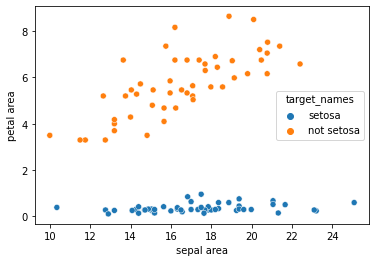

In [4]:
sns.scatterplot(data=df, x='sepal area', y='petal area', hue='target_names')
plt.show()

## Training

The code below is the training process of SVM using 200 epochs and $10^{-3}$ learning rate ($\alpha$) with $C=1.5$.

No handles with labels found to put in legend.


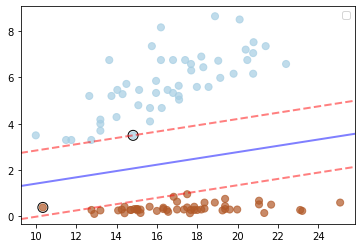

In [26]:
# initialization

X = df[['sepal area','petal area']].values
y = df['target']

n, d = X.shape

C = 1.5
alpha = 1e-4 #learning rate
w = np.random.randn(1,d)
b = 0
loss_history = []
epochs = 200
_support_vectors = 0
w_history = []
A_history = []
_support_vectors_history=[]

for _ in range(epochs):
    # Forward Propagation
    w_history.append(w)
    A = X@w.T + b
    A_history.append(A)
    z = y*A.reshape(n) #margin
    misclassified_idx = np.where(z<=1)[0]

    loss = 1/2 * w@w.T + C*np.sum(np.maximum(0,1-z))
    loss_history.append(loss[0][0])

    #backward propagation
    d_w = w - C*(y[misclassified_idx].values.reshape(len(misclassified_idx),1).T@X[misclassified_idx,:])
    w = w - alpha*d_w

    d_b = -C*np.sum(y[misclassified_idx])
    b = b - alpha*d_b

    _support_vectors = np.where(z <= 1)[0]
    _support_vectors_history.append(_support_vectors)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired, alpha=.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z =  (xy.dot(w.T) + b).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

# highlight the support vectors
ax.scatter(X[:, 0][_support_vectors], X[:, 1][_support_vectors], s=100,
            linewidth=1, facecolors='none', edgecolors='k')


ax.legend()
plt.show()

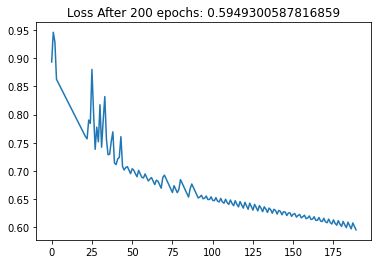

In [10]:
plt.plot(loss_history[int(epochs/20):])
plt.title('Loss After {} epochs: {}' .format(epochs, loss[0][0]))
plt.show()

## Training Result
In the animated graph below shown how the margin change in every epoch until it's finally reached its optimized point.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


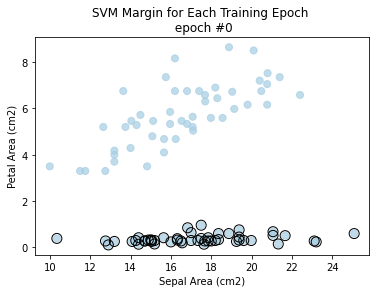

In [19]:
fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], c=np.sign(A_history[0]), s=50, cmap=plt.cm.Paired, alpha=.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z =  (xy.dot(w_history[0].T) + b).reshape(XX.shape)

# plot decision boundary and margins
line = ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

def animate(i):
    ax.clear()

    ax.scatter(X[:, 0], X[:, 1], c=np.sign(A_history[i]), s=50, cmap=plt.cm.Paired, alpha=.7)

    Z =  (xy.dot(w_history[i].T) + b).reshape(XX.shape)

    line = ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
    
    ax.scatter(X[:, 0][_support_vectors_history[i]], X[:, 1][_support_vectors_history[i]], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlabel('Sepal Area (cm2)')
    ax.set_ylabel('Petal Area (cm2)')
    ax.set_title('SVM Margin for Each Training Epoch \n epoch #{}' .format(i))
    return line, plt, ax

ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=False, save_count=epochs)

In [20]:
ani.save('SVMFromScratch.gif', writer = "pillow", fps=10)
HTML(ani.to_html5_video())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.
